In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.estimator import LinearClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/diegobarbosa/opt/anaconda3/lib/python3.7/s

/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/diegobarbosa/opt/anac

In [4]:
print(tf.__version__)

1.14.0


In [5]:
# nombres de las columnas de los datos
col_names = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

# lee los datos
training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")
training = pd.read_csv(training_data_path, names=col_names, header=0)
test = pd.read_csv(test_data_path, names=col_names, header=0)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [6]:
test

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1
5,6.2,2.9,4.3,1.3,1
6,5.5,4.2,1.4,0.2,0
7,6.3,2.8,5.1,1.5,2
8,5.6,3.0,4.1,1.3,1
9,6.7,2.5,5.8,1.8,2


In [8]:
# esta sección es para omitir la clase 0: "Setosa" y recodificar loa datos  de entrenamiento
training = training[training['Species'] >= 1]
training['Species'] = training['Species'].replace([1,2], [0,1])

# esta sección es para omitir la clase 0: "Setosa" y recodificar los datos  de validación
test = test[test['Species'] >= 1]
test['Species'] = test['Species'].replace([1,2], [0,1])

# omite los índices de los dos dataframes para poderlos concadenar
training.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# concadena los dataframes
iris_dataset = pd.concat([training, test], axis=0)

/Users/diegobarbosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
iris_dataset

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,1
1,5.0,2.3,3.3,1.0,0
2,4.9,2.5,4.5,1.7,1
3,6.9,3.1,5.1,2.3,1
4,6.7,3.1,4.4,1.4,0
...,...,...,...,...,...
17,5.8,2.7,3.9,1.2,0
18,6.1,3.0,4.6,1.4,0
19,6.7,3.1,4.7,1.5,0
20,6.7,3.3,5.7,2.5,1


In [10]:
iris_dataset.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77,  0,  1,  2,  3,  4,  5,  6,
             7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
           dtype='int64')

In [11]:
iris_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLength,100.0,6.262,0.662834,4.9,5.800,6.3,6.700,7.9
SepalWidth,100.0,2.872,0.332751,2.0,2.700,2.9,3.025,3.8
PetalLength,100.0,4.906,0.825578,3.0,4.375,4.9,5.525,6.9
PetalWidth,100.0,1.676,0.424769,1.0,1.300,1.6,2.000,2.5
Species,100.0,0.500,0.502519,0.0,0.000,0.5,1.000,1.0


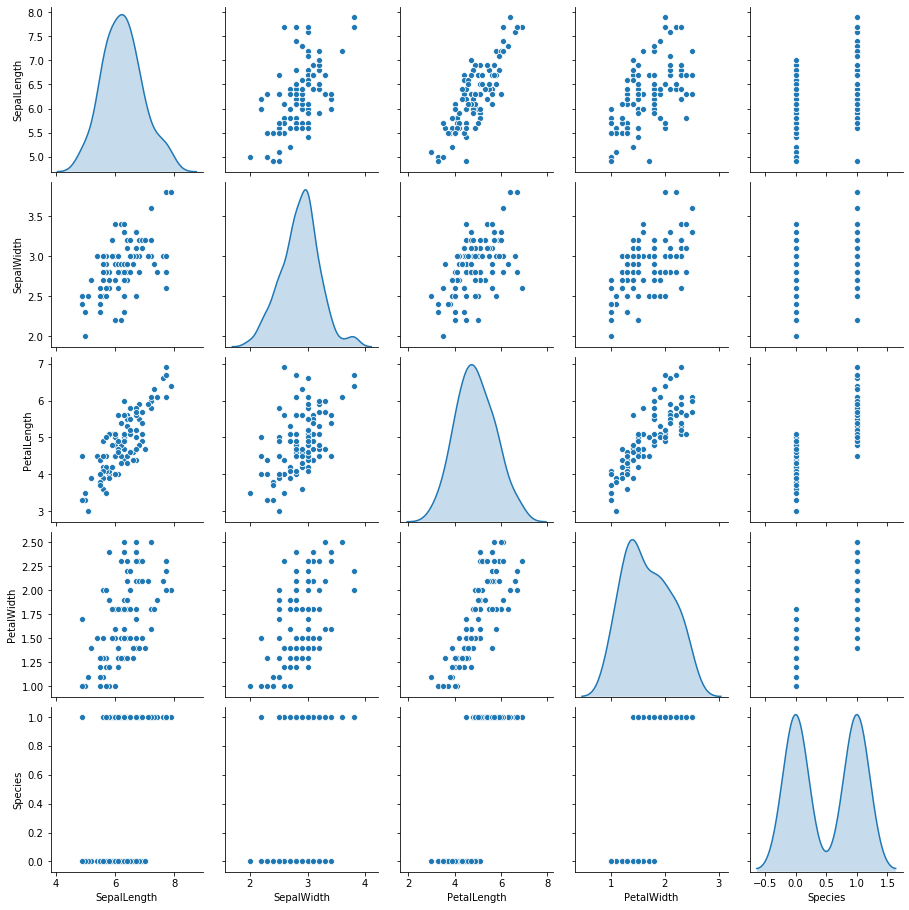

In [12]:
sb.pairplot(iris_dataset, diag_kind="kde")

In [13]:
correlation_data = iris_dataset.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
SepalLength,1.000000,0.553855,0.828479,0.593709,0.494305
SepalWidth,0.553855,1.000000,0.519802,0.566203,0.308080
PetalLength,0.828479,0.519802,1.000000,0.823348,0.786424
PetalWidth,0.593709,0.566203,0.823348,1.000000,0.828129
Species,0.494305,0.308080,0.786424,0.828129,1.000000


In [14]:
 X_data = iris_dataset[[m for m in iris_dataset.columns if m not in ['Species']]]
Y_data = iris_dataset[['Species']]

In [15]:
X_data


,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,6.9,3.1,5.1,2.3
4,6.7,3.1,4.4,1.4
...,...,...,...,...
17,5.8,2.7,3.9,1.2
18,6.1,3.0,4.6,1.4
19,6.7,3.1,4.7,1.5
20,6.7,3.3,5.7,2.5


In [16]:
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

In [17]:
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])

print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  80
No. of rows in Test Features:  20
No. of columns in Training Features:  4
No. of columns in Test Features:  4
No. of rows in Training Label:  80
No. of rows in Test Label:  20
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [18]:
stats = training_features.describe()
stats = stats.transpose()
stats


,count,mean,std,min,25%,50%,75%,max
SepalLength,80.0,6.26000,0.670651,4.9,5.800,6.25,6.700,7.9
SepalWidth,80.0,2.86500,0.352962,2.0,2.675,2.90,3.025,3.8
PetalLength,80.0,4.86875,0.850107,3.0,4.300,4.80,5.500,6.9
PetalWidth,80.0,1.64125,0.418464,1.0,1.300,1.55,1.925,2.5


In [19]:
stats = test_features.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
SepalLength,20.0,6.270,0.647343,5.2,5.700,6.35,6.725,7.6
SepalWidth,20.0,2.900,0.240613,2.5,2.775,2.95,3.025,3.4
PetalLength,20.0,5.055,0.719265,3.9,4.575,5.05,5.600,6.6
PetalWidth,20.0,1.815,0.431978,1.2,1.375,1.80,2.225,2.4


In [20]:
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

In [21]:
def feed_input(features_dataframe, target_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

train_feed_input = feed_input(normed_train_features, training_labels)
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

In [22]:
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]
logistic_model = LinearClassifier(feature_columns=feature_columns_numeric)
feature_columns_numeric
logistic_model.train(train_feed_input)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/1q/0hxf4fzj2jbglfwkb_9dr8680000gn/T/tmppe4pnvtx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa85fb5c250>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. 

In [23]:
train_predictions = logistic_model.predict(train_feed_input_testing)
test_predictions = logistic_model.predict(test_feed_input)

In [24]:
train_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in train_predictions])
test_predictions_series = pd.Series([p['classes'][0].decode("utf-8")   for p in test_predictions])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/1q/0hxf4fzj2jbglfwkb_9dr8680000gn/T/tmppe4pnvtx/model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/1q/0hxf4fzj2jbglfwkb_9dr8680000gn/T/tmppe4pnvtx/model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [25]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])

In [26]:
training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

In [27]:
train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)

In [28]:
def calculate_binary_class_scores(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred.astype('int64'))
  precision = precision_score(y_true, y_pred.astype('int64'))
  recall = recall_score(y_true, y_pred.astype('int64'))
  return accuracy, precision, recall

In [29]:
train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)
print('Test Data Accuracy (%) = ', round(test_accuracy_score*100,2))
print('Test Data Precision (%) = ', round(test_precision_score*100,2))
print('Test Data Recall (%) = ', round(test_recall_score*100,2))

Training Data Accuracy (%) =  93.75
Training Data Precision (%) =  94.59
Training Data Recall (%) =  92.11
--------------------------------------------------
Test Data Accuracy (%) =  95.0
Test Data Precision (%) =  100.0
Test Data Recall (%) =  91.67


In [30]:
train_predictions_series

0     1
1     0
2     1
3     1
4     0
     ..
75    0
76    0
77    0
78    1
79    1
Length: 80, dtype: object

In [31]:
train_predictions_df

,predictions
0,1
1,0
2,1
3,1
4,0
...,...
75,0
76,0
77,0
78,1
